# Στοχαστικές Διαδικασίες - 3η Εργαστηριακή Άσκηση

## Στοιχεία Φοιτητή:
* Ονοματεπώνυμο: Ιωάννης Δάρας
* Αριθμός Μητρώου: 03115018
* Σχολή: ΗΜΜΥ, ΕΜΠ
* Εξάμηνο: 8ο
* E-mail: daras.giannhs@gmail.com

## Στόχος εργαστηρίου
Αρχικά, κάνουμε τα απαιραίτητα imports.

In [1]:
from simple_markov_chain_lib import markov_chain
import numpy as np
import matplotlib.pyplot as plt
# to plot the results in the notebook:
%matplotlib inline

## 1ο Μέρος - Ερωτήσεις κατανόησης

1. Έχουμε:
$$y = 32 \cdot x^3 \Rightarrow $$

$$log_2 y = log_2 \left( 32 \cdot x^3 \right)$$

$$
log_2y =  log_232 + log_2x^3 \iff 
$$

$$
log_2y = log_2 32 + 3 \cdot log_2x \iff
$$

$$
log_2y = 3 \cdot log_2x + 5
$$

Παρατηρούμε από την παραπάνω εξίσωση, ότι οι μεταβλητές λογαριθμικής κλίμακας $log_2y, log_2x$ συνδέονται με εξίσωση ευθείας.

2. Χρησιμοποιούμε τον βοηθητικό κώδικα που μας δίνεται για να σχηματίσουμε την γραφική $logy = f(logx)$. 
Γραφικά, η κλίση της ευθείας προσδιορίζεται από δύο σημεία της γραφικής παράστασης ως εξής:
$$ a = \frac{y_2 - y_1}{x_2 - x_1}$$

Το σημείο τομής με τον $logx = 0$ βρίσκεται με τη βοήθεια της συνάρτησης `where` του `numpy`.

Slope estimation: 3.0
Crossing with logx point: (0.0, 5.0)


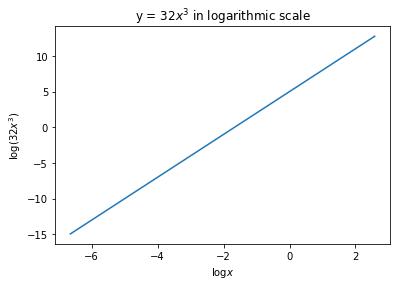

In [2]:
start, end, step = 0.01, 6.0, 0.01
x = np.arange(start, end, step)
y = 32 * x**3
newx = np.log2(x)
newy = np.log2(y)
plt.figure(2)
plt.plot(newx, newy)
plt.xlabel('$\logx$')
plt.ylabel('$\log(32x^3)$')
plt.title('y = $32x^3$ in logarithmic scale')

# Slope estimation
print('Slope estimation: {}'.format((newy[1] - newy[0])/ (newx[1] - newx[0])))

# Point estimation
index = np.where(newx == 0)
print('Crossing with logx point: ({}, {})'.format(newx[index][-1], newy[index][-1]))

3. Αρχικά, κατασκευάζουμε στο ίδιο γράφημα τις συναρτήσεις: 
$$y_1 = 8x^3, \quad y_2 = 8x^2 $$

Οι γραφικές παραστάσεις των συναρτήσεων αυτών προφανώς δεν αντιστοιχούν σε ευθείες. Αν όμως λογαριθμήσουμε τους άξονες x, y παίρνουμε παραστάσεις ευθειών, ακριβώς όπως είδαμε στα προήγουμενα ερωτήματα κατανόησης. Για αυτές τις ευθείες μπορούμε να υπολογίσουμε την κλίση όπως φαίνεται παρακάτω:


Slope of y1: 3.0,   Slope of y2: 2.0


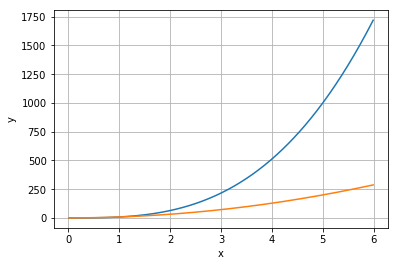

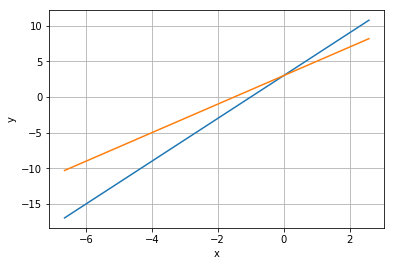

In [3]:
start, end, step = 0.01, 6.0, 0.01
x = np.arange(start, end, step)
y1 = 8*x**3
y2 = 8*x**2

''' Normal plots '''
plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

'''Plots with logarithmic axis '''
logx = np.log2(x)
logy1 = np.log2(y1)
logy2 = np.log2(y2)
plt.figure()
plt.plot(logx, logy1)
plt.plot(logx, logy2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)


a1 = (logy1[1] - logy1[0]) / (logx[1] - logx[0])
a2 = (logy2[1] - logy2[0]) / (logx[1] - logx[0])
print('Slope of y1: {},   Slope of y2: {}'.format(a1, a2))

4. Αριθμητικός υπολογισμός της κλίσης της αρχικής ευθείας

In [4]:
np.polyfit(newx, newy, 2)[-1]

4.999999999999995

## 2ο Μέρος - Εξάρτηση πιθανότητας νίκης γύρου και νίκης παιχνιδιού σε έναν αγώνα τένις
Ήδη από προηγούμενο εργαστήριο έχουμε βρει τον στοχαστικό πίνακα της στοχαστική διαδικασία $\{X_k\}_{k \in \mathbb N_0}$, που περιγράφει ένα game τένις, ορισμένη σε έναν χώρο καταστάσεων $\mathbb X$. 


Σε αυτό το εργαστήριο, μπορούμε να μελετήσουμε την εξάρτηση της νίκης ενός game του παίκτη Α από την πιθανότητα νίκης ενός γύρου. Πιο συγκεκριμένα, $\forall p \in Κ$ όπου Κ ένα προκαθορισμένο σύνολο τιμών του p που δοκιμάζουμε, κάνουμε Μ εκτιμήσεις, κάθε μία από τις οποίες περιέχει N δείγματα. 

Στο τέλος, σχεδιάζουμε τη γραφική παράσταση που στον οριζόντιο άξονα έχει τα διάφορα p και στον κατακόρυφο άξονα έχει την προσδωκόμενη πιθανότητα νίκης του Game από τον Α, όπως προέκυψε παίρνοντας τον μέσο όρο των M εκτιμήσεων.

Όλα αυτά φαίνονται στα παρακάτω κελιά κώδικα:


In [5]:
probabilities = np.arange(0, 1, 0.02)
points = probabilities.size
M = 50  # number of estimations
N = 200 # number of samples
y = np.empty(M)
for p_index, p in enumerate(probabilities):
    markov_table = {
        '0-0': {'15-0': p, '0-15': 1-p},
        '15-0': {'30-0': p, '15-15': 1-p},
        '15-15': {'30-15': p, '15-30': 1-p},
        '30-15': {'40-15': p, 'Deuce': 1-p},
        '30-0': {'40-0': p, '30-15': 1-p},
        '40-0': {'GameA': p, '40-15': 1-p},
        '40-15': {'GameA': p, 'AdvA': 1-p},
        'GameA': {'GameA': 1},
        'AdvA': {'GameA': p, 'Deuce': 1-p},
        'Deuce': {'AdvA': p, 'AdvB': 1-p},
        'AdvB': {'Deuce': p, 'GameB': 1-p},
        'GameB': {'GameB': 1},
        '0-15': {'15-15': p, '0-30': 1-p},
        '0-30': {'15-30': p, '0-40': 1-p},
        '15-30': {'Deuce': p, '15-40': 1-p},
        '0-40': {'15-40': p, 'GameB': 1-p},
        '15-40': {'AdvB': p, 'GameB': 1-p},
    }
    init_probs = {'0-0': 1.0}
    mc = markov_chain(markov_table, init_probs)
    estimations = np.empty(M)
    for i in range(M):
        counter = 0
        for j in range(N):
            mc.start()
            while mc.running_state not in ['GameA', 'GameB']:
                mc.move()
            if (mc.running_state == 'GameA'):
                counter += 1
        estimations[i] = counter / N
    y[p_index] = np.average(estimations)

Text(0.5,1,'Dependence of round probability win to game probability win')

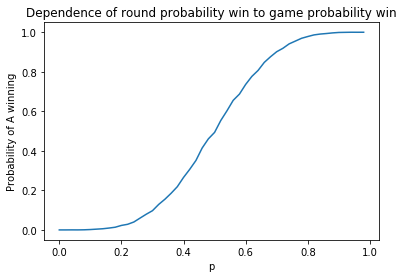

In [6]:
fig = plt.figure()
plt.plot(probabilities, y)
plt.xlabel('p')
plt.ylabel('Probability of A winning')
plt.title('Dependence of round probability win to game probability win')

### Σχολιασμός γραφικής παράστασης

Από τη γραφική παράσταση, εξάγουμε τις ακόλουθες παρατηρήσεις:
* Όπως αναμένουμε, αύξηση του p οδηγεί σε αύξηση της πιθανότητας νίκης του παιχνιδιού από τον Α.
* Η συνάρτηση έχει σιγμοειδή μορφή. Αρχικά, αύξηση του p οδηγεί σε απότομη αύξηση της πιθανότητας νίκης του Α. Στη συνέχεια, η αύξηση αυτή γίνεται όλο και πιο λεία όσο οι τιμές του p μεγαλώνουν.
* Όπως αναμένουμε, για p=0 η πιθανότητα νίκης είναι 0 και για p=1 η πιθανότητα νίκης είναι 1.

Οι παραπάνω παρατήρησεις φανερώνουν την μη γραμμική σχέση μεταξύ του p και της πιθανότητας νίκης του Α.

## 3ο Μέρος - Άσκηση 87

Στο μέρος αυτό μετράμε πειραματικά τους χρόνους απορρόφησης.
Αρχικά, ορίζουμε τη στοχαστική διαδικασία που περιγράφεται από τον στοχαστικό πίνακα που φαίνεται παρακάτω:

In [7]:
markov_table = {
    0: {1: .5, 2: .5},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 3: .25, 4: .25},
    4: {4: 1.}
}

# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1

mc = markov_chain(markov_table, init_dist)

Για την στοχαστική διαδικασία αυτή, οι καταστάσεις 2, 4 είναι απορροφητικές.

Μια σημαντική πληροφορία που μας ενδιαφέρει είναι ο μέσος χρόνος που χρειάζονται προκειμένου να απορροφήσουν την στοχαστική διαδικασία, έστω $E_N$. Για να βρούμε αυτό τον χρόνο, τρέχουμε Μ φορές Ν πειράματα και μετράμε τους χρόνους και από το μέσο χρόνο των Ν πειραμάτων, προκύπτει η εκάστοτε εκτίμηση από τις Μ.

Αυτό που μας ενδιαφέρει είναι να μελετήσουμε τη συσχέτιση μεταξύ του N και του $E_N$ για ένα σταθερό πλήθος εκτιμήσεων Μ=30.

Όλα αυτά, φαίνονται στο ακόλουθο κομμάτι κώδικα:

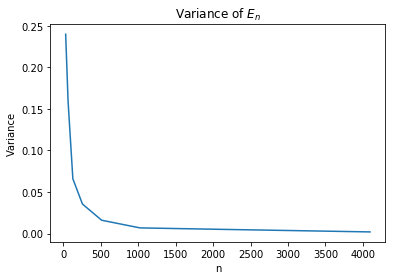

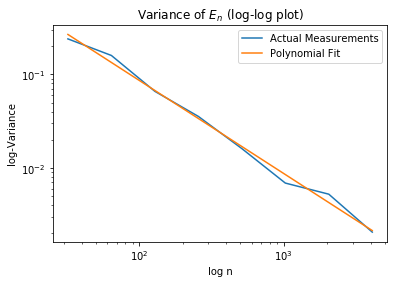

In [8]:
# M = 30 # experiments
variances = np.empty(8)
NN = np.empty(8)
ll = 0
for k in range(5, 13):
    estimations = np.empty(M)
    sample_size = 2 ** k  # Ν
    NN[ll] = sample_size
    for j in range(M):
        running_total = 0
        for i in range(sample_size):
            mc.start()
            while mc.running_state != 2 and mc.running_state != 4: 
                mc.move()
            running_total += mc.steps
        mc_estimate = running_total / sample_size
        estimations[j] = mc_estimate
    variances[ll] = np.var(estimations)
    ll += 1
    
plt.figure();   
plt.plot(NN, variances);
plt.title('Variance of $E_n$')
plt.xlabel('n')
plt.ylabel('Variance')

plt.figure();
plt.title('Variance of $E_n$ (log-log plot)')
plt.xlabel('log n')
plt.ylabel('log-Variance')
plt.loglog(NN, variances, label='Actual Measurements');

p, q = np.polyfit(np.log (NN) , np.log(variances), 1)  

plt.loglog(NN, np.exp (q) * (NN ** p), label='Polynomial Fit')    
plt.legend();


Παρατηρούμε ότι όσο αυξάνεται το πλήθος των δειγμάτων τόσο το $V[E_n]$ πέφτει και μάλιστα με ρυθμό εκθετικό. Αυτό συμφωνεί με τον Ασθενή Νόμο των Μεγάλων Αριθμών.